<h1 style="text-align: right"> FIT1043 - Introduction to Data Science </h1>
<h1 style="text-align: right"> Assignment 2 </h1>
<h2 style="text-align: right"> Timothy Wee Yan Yi </h2>
<h2 style="text-align: right"> StudentID: 31965830 </h2>


--- 

## 1. Introduction 
This assignment introduces basic machine learning predidctive models into our Data Science knowledge pool. The premise of the assignment is about essays and how we can use models to predict the scores of essays based on input parameters. The first thing we will do is import the necessary libraries: **Numpy, SKlearn, Matplotlib and Pandas** . The SKlearn library is used for our model generation. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will also be importing the csv file 'FIT1043-Essay-Features.csv'.



In [4]:
dataset = pd.read_csv('FIT1043-Essay-Features.csv')
dataset.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [5]:
dataset.shape

(1332, 19)

In [6]:
dataset.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


Our dataset is a table where each row corresponds to a unique essay with common charactieries associated with it such as word count, punctuations, etc. There is 1332 unique essays in this file. The table above shows basic statistical descriptions of our dataset. 

---

## 2. Supervised Learning 


Supervised learning is a style of machine learning which an algorithm uses both the input and output data to create a model. This is typically done by giving a machine learning algorithm a training data set to create the model and we can verify its accuracy using a testing data set. In the context of the assignmnet we will be splitting the dataset into test and train data sets. The training data set is also the labelled data, data which has a tag or identifier to it (in the context of the assignment the score of the essay is the label). 

We will be using Scikitlearn to split our dataset. 


### Feature Selection 
Before we perform our classification we will be selecting a few features from the dataset to improve the machine learning model as uneccesary features can distort the classification processes. Below are some features which I will keep and reasons why 
I do so. <br />

* **chars, words, commas** : Shows that the writer is capable of constructing longer more complex sentences; a higher number of   these features could mean a better grasp at the language. <br />
* **sentences** : A higher number of senteces present can also damonstrate better writing skills.<br />
* **questions** : Demonstrates the writers ability to use a varitey of sentences. <br />
* **avg_word_sentence** : A longer sentence could demonstrate a greater skill.<br />
* **POS** : POS(Part of speech) demonstrates a writer's grammar ability. <br />
* **prompt_words** : Prompt words could deomstrate the writer's ability to stay on topic when writting the essay. <br /> 
* **Synonyms, unstemmed, stemmed words** : These features demonstrates a writer's ability to move beyond common english words and showcases more complex sentences and grammar. <br />

Some features like _/total_words_ are removed as it does not show a huge difference between the scores. Irrelevant features like 
apostrophes and punctuation and avg_word_length does not truly demonstrate a writer's ability. Lastly the essayID is removed as it is not related to essays at all. <br />




In [7]:

X = dataset.drop(["essayid", "score", "apostrophes", "punctuations", 'avg_word_length', 'POS/total_words', 'synonym_words/total_words', 'prompt_words/total_words'], axis = 1) #x axis without the essayid as it is irrelevent 
y = dataset["score"] #labelled data which is our target
from sklearn.model_selection import train_test_split #split our dataset 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.20, random_state = 0
)

### 3. Classification 
There are mainly 2 kinds of classification, the first would be a binary classification which classifies a dataset into two distinct groups, for example spam filters classifying if a mail is spam or not spam. The second type is known as multi class classification which classifies a data set into 3 or more groups. For example, species of dogs. For our essay score prediction we will be using multi class classification as the scores of essays are in a range and cannot be quantified to only two groups. 

Due to the distance disparity between our numerical values, we will need to normalize our dataset to ensure that no extreme values can alter the model by having a greater weightage. 

In [8]:
# Scalling the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #scale the data on X_train
X_test = sc.transform(X_test) #reapply the scale for X_test 

Support Vector Machines, also known as SVM is a method of classification which uses support vector lines to classify data points into distinct groups and use these groups to predict which class do new groups belong to. The first step in constructing a SVM is to identify a hyperplane, which is a line that divides the datapoints into classes. Next, we find the margins between the hyperplane and the support vector which creates an area of margin which the model uses to predict which data points belong to a class. The image attached below showcases how this works. Credits: DataFlair <br/>
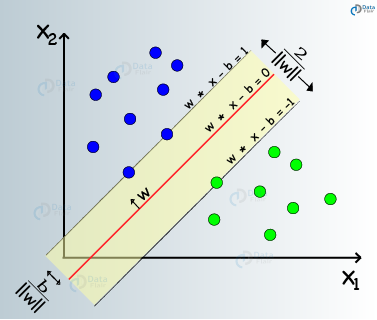

A very important aspect of SVM is the idea of kernels which is a function which creates the hyperplanes 

In [9]:
#Import svm model
from sklearn import svm

#Create the svm model
svm_model = svm.SVC(kernel = 'linear') #a kernel is the "function" of a SVM. A linear kernel will produce linear hyperplanes 

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict using the testing data set, use y_pred to later compare with y_test 
y_pred = svm_model.predict(X_test)

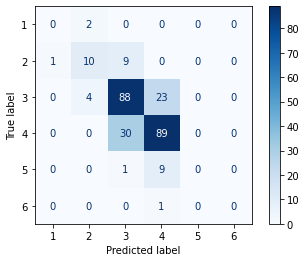

In [16]:
#get the confusion matrix and qwk score 
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score
plot_confusion_matrix(svm_model, X_test, y_test, cmap = 'Blues')  #plot the confusion matrix 
plt.show()



In [11]:
cohen_kappa_score(y_test, y_pred, weights = 'quadratic') #output the kappa score weighted as quadratic 

0.650512921981066

A confusion matrix showcases the performance of a model by identifying areas which a model gave a false prediction. The direct diagonal line from top [0][0] to the bottom [5][5] is the true values which means that the scores of y_pred and y_test of the particular score is correctly matched whereas values on the rest of the matrix indicate that the model has predicted a false and inacurate score. Based on our confusion matrix we can see that majority of the false predictions ocur between scores 3 and 4. This could be due to it being the median value thus it does not have extreme data points to support the differences between the two scores. <br />

The Quadratic Weighted Kappa Score, also known as QWK score is a method of numerically rating the interrated reliability ranging from 0 - 1. In the context of machine learning, the score is based on how well the predicted results agree with the actual results. A QWK score of 0.65 is considered moderate. 

### 4. Kaggle Competiton 


I will be using the model we created to predict the scores of a new dataset and submit those results on Kaggle. 
I will use the new dataset and pass it into our model to get the predicted output following a similar method above. 


In [12]:
dataset1 = pd.read_csv('FIT1043-Essay-Features-Submission.csv') #read new file 
"Drop uneccsary features"
Xnew = dataset1.drop(["essayid", "apostrophes", "punctuations",'avg_word_length', 'POS/total_words', 'synonym_words/total_words', 'prompt_words/total_words'], axis = 1)
Xnew = sc.transform(Xnew) #Normalize our data 

In [13]:
Xnew #check if the data is normalized 

array([[ 2.48921683,  2.68114836,  1.16983819, ...,  1.89396095,
         1.73658159,  1.86104435],
       [-0.71879201, -0.82049779, -0.36094531, ..., -1.31486567,
        -0.80442813, -0.88327541],
       [-0.46031623, -0.56634606,  0.17933122, ..., -0.40754228,
        -0.72405556, -0.75048575],
       ...,
       [ 0.38112871,  0.24129169,  0.62956166, ..., -0.20837373,
         0.43825546,  0.44462124],
       [-1.14846602, -1.19325367, -0.09080704, ..., -1.0493076 ,
        -1.29902856, -1.26267446],
       [-0.01497702,  0.04361811, -0.36094531, ...,  0.23422304,
         0.19713775,  0.14110201]])

In [14]:
Y_pred_new = svm_model.predict(Xnew) #capture the predicted scores

In [15]:
dataset1['score'] = Y_pred_new #create new column with the score 

In [293]:
dataset1

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750,4
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316,3
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337,3
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605,4
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1226,1208,242,8,8,0,4.991736,13,0,18.615385,237.327684,0.980693,135,0.557851,58,0.239669,244,242,3
195,862,4039,817,24,11,1,4.943696,47,2,17.382979,812.656033,0.994683,386,0.472460,210,0.257038,750,750,4
196,1562,2448,468,22,7,0,5.230769,22,0,21.272727,465.656652,0.994993,224,0.478632,101,0.215812,540,526,4
197,1336,1081,214,14,5,0,5.051402,11,0,19.454545,212.990566,0.995283,114,0.532710,63,0.294393,259,256,3


In [294]:
dataset_sub = pd.read_csv('99999999-YourName-1.csv') #read submission csv

In [295]:
dataset_sub['score'] = dataset1['score'] #create a new column to submit

In [297]:
dataset_sub.to_csv('99999999-YourName-1.csv') #save the csv 

### Conclusion : The Art of Storytelling 

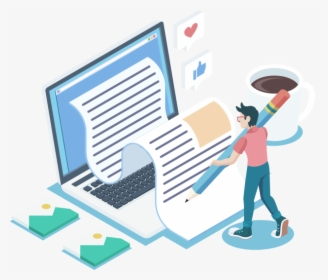

Writing is a form of art, one which is used to express a myraid of stories and ideas. A canvas used to explore fictional worlds, and a medium for intellectual understanding. Essay writing is present in our everyday world and an algorithmic way of scoring essays can help to remove elements of the marking process such as marker bias and human error, providing a fairer marking system. With great computing power comes greater speeds of grading essays which further reduces the workload of markers. The benefits of having an essay marking system seems favourable, however, the nature of essays itself plays a huge role on its accuracy. 

There are many aspects of writing and storytelling which cannot be quantifiable in a computer. For example, the flow and structure of an essay is something only an experienced reader can truly understand and it is hard to train a model to understand this unfamiliar concept. The genre of an essay also makes it difficult to accuratly predict scores when the features selected may be irrelavant to that genre (eg: poetry). To improve our current feature sets for our model we should also include other key indicators such as vocabulary used( eg: number of uncommon vocab words), grammar score and prompt word synonyms. Essay grading models should be used on more quantitative, non-fictional, pieces of work such as news articles. 

Writing is a form of art, one which is used to express a myraid of stories and ideas. Sooner or later we will share this canvas with machines, coexisting together to expand the world of literature. 


### References 
Support Vector Machines Tutorial - Learn to implement SVM in Python - DataFlair. (2017, August 4). Retrieved April 29, 2021, from DataFlair website: https://data-flair.training/blogs/svm-support-vector-machine-tutorial/

sklearn.svm.SVC — scikit-learn 0.24.2 documentation. (2020). Retrieved April 29, 2021, from Scikit-learn.org website: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

